# Определение перспективного тарифа для телеком компании

В нашем распоряжении данные 500 пользователей «Мегалайна» — федерального оператора сотовой связи: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, необходимо понять, какой тариф приносит больше денег.

### План работ по анализу данных пользователей «Мегалайна»

<div class="alert alert-info" role="alert">
Нам представлены данные 500 пользователей «Мегалайна» — федерального оператора сотовой связи. Массив данных содержит информацию с описанием 2-х тарифов «Смарт» и «Ультра», в которую входят ежемесячная плата, стоимость услуг согласно тарифному пакету, стоимость услуг сверх тарифного пакета. 
Данные представляют собой 5 таблиц с информацией о пользователях, информацией о звонках, информацией о сообщениях, информацией об интернет-сессиях и информацией о тарифах.

Шаг 1. Откроем файлы с данными и изучим общую информацию. Постараемся заполнить пропуски по мере необходимости, вывести корректное время и т.д.
Добавим необходимые столбцы для удобства анализа, сравнения и получения дополнительных данных.

Шаг 2. Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Шаг 3. Проанализируем данные:
Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

Шаг 4. Проверим гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 
</div>

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
df_calls = pd.read_csv("/datasets/calls.csv")
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [2]:
display(df_calls.head(10))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Таблицы заполнены полностью, требуется подработка столбца call_date, из которого необходимо определить только месяц. Столбец duration (время звонков) необходимо округлить до целых минут в большую сторону. От звонков со значением 0.00 мы избавимся - это скорее всего те звонки, при которых абонент не дозвонился.

In [3]:
df_internet = pd.read_csv("/datasets/internet.csv")

In [4]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
display(df_internet.head(10))

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Таблицы заполнены полностью, требуется подработка столбца session_date, из которого необходимо определить только месяц. Столбец mb_used (израсходованный трафик) необходимо округлить до целых значений в большую сторону.

In [6]:
df_messages = pd.read_csv("/datasets/messages.csv")

In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
display(df_messages.head(10))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Таблицы заполнены полностью, требуется подработка столбца message_date, из которого необходимо определить только месяц.

In [9]:
df_tariffs = pd.read_csv("/datasets/tariffs.csv")

In [10]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
display(df_tariffs.head(10))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблицы заполнены полностью, подработка не требуется.

In [12]:
df_users = pd.read_csv("/datasets/users.csv")

In [13]:
display(df_users.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
display(df_users['tariff'].value_counts())

smart    351
ultra    149
Name: tariff, dtype: int64

Число исследуемых абонентов соответствует заявленным 500. 38 абонентов прекратили пользоваться тарифом на момент выгрузки данных. 351 абонент пользуется тарифом smart и 149 тарифом ultra. Подработка данных не требуется.

Произведем подработку датасета calls. Добавим строки с месяцами и временем звонков. 
Во всех данных присутствует user_id и мы добавляем данные по месяцам, поэтому сгруппируем наши таблицы по этим параметрам для их дальнейшего объединения и изучения.

### Шаг 2. Посчитаем для каждого пользователя объем потребляемых услуг

In [16]:
import numpy as np

In [17]:
df_calls['duration_minutes'] = df_calls['duration'].apply(np.ceil)
#display(df_calls)

In [18]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='')
df_calls['month'] = df_calls['call_date'].dt.month
display(df_calls.head(10))

,id,call_date,duration,user_id,duration_minutes,month
0,1000_0,2018-07-25,0.00,1000,0.0,7
1,1000_1,2018-08-17,0.00,1000,0.0,8
2,1000_2,2018-06-11,2.85,1000,3.0,6
3,1000_3,2018-09-21,13.80,1000,14.0,9
4,1000_4,2018-12-15,5.18,1000,6.0,12
5,1000_5,2018-11-02,0.00,1000,0.0,11
6,1000_6,2018-10-18,0.00,1000,0.0,10
7,1000_7,2018-08-22,18.31,1000,19.0,8
8,1000_8,2018-09-15,18.44,1000,19.0,9
9,1000_9,2018-08-15,0.00,1000,0.0,8


In [19]:
df_calls.info()
display(df_calls['duration'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id                  202607 non-null object
call_date           202607 non-null datetime64[ns]
duration            202607 non-null float64
user_id             202607 non-null int64
duration_minutes    202607 non-null float64
month               202607 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 9.3+ MB


0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

Уберем нулевые значения звонков и объединим датасет calls с датасетом users для возможности привязать id к тарифу и определить затраты абонента по месяцам.

Нулевые значения звонков составляют около 40 тыс строк из 200 тыс. Скорее всего это звонки, когда один абонент не смог дозвониться до другого абонента. Таких "недозвонов" у нас около 20%. Уберем данные занчения, поскольку они не учавствуют в тарификации звонков.

In [20]:
df_calls_0 = df_calls.query('duration != "0"')
df_calls_users = df_calls_0.merge(df_users, on = 'user_id', how='outer')
#df_calls_users

In [21]:
df_calls_group = df_calls_users.groupby(['user_id', 'month']).agg({'duration_minutes': ['count', 'sum'], 'tariff': ['first']})
#display(df_calls_group)

In [22]:
df_calls_group.columns = ['duration_count', 'duration_sum', 'tarif']
display(df_calls_group)

duration_count  duration_sum  tarif
user_id month                                     
1000    5.0                17         159.0  ultra
        6.0                28         172.0  ultra
        7.0                41         340.0  ultra
        8.0                42         408.0  ultra
        9.0                46         466.0  ultra
...                       ...           ...    ...
1498    10.0               30         247.0  smart
1499    9.0                 8          70.0  smart
        10.0               44         449.0  smart
        11.0               62         612.0  smart
        12.0               56         492.0  smart

[3168 rows x 3 columns]

Добавим столбец с ежемесячными тратами на звонки с учетом стоимости самого тарифа

In [23]:
def calls(row):
    calls_row = row['tarif']
    calls_total_row = row['duration_sum']

    if calls_row == 'smart' and calls_total_row <= 500:
            return '0'

    if calls_row == 'smart' and calls_total_row > 500:
        return (0 + (calls_total_row - 500)*3)
    
    if calls_row == 'ultra' and calls_total_row <= 3000:
        return '0'
             
    return (0 + (calls_total_row - 3000)*1)


row_columns_calls = ['tarif', 'duration_sum']
row = pd.Series(index=row_columns_calls)
df_calls_group['calls_variant'] = df_calls_group.apply(calls, axis=1)
display(df_calls_group.tail(10))
#display(df_calls_group.sample(10))

duration_count  duration_sum  tarif calls_variant
user_id month                                                   
1497    11.0               48         371.0  smart             0
        12.0               58         545.0  smart           135
1498    7.0                20         175.0  smart             0
        8.0                43         400.0  smart             0
        9.0                53         471.0  smart             0
        10.0               30         247.0  smart             0
1499    9.0                 8          70.0  smart             0
        10.0               44         449.0  smart             0
        11.0               62         612.0  smart           336
        12.0               56         492.0  smart             0

Произведем подработку датасета internet. Добавим строки с месяцами и интернет трафиком. 
Во всех данных присутствует user_id и мы добавляем данные по месяцам, поэтому сгруппируем наши таблицы по этим параметрам для их дальнейшего объединения и изучения.

In [24]:
df_internet['mb_sum'] = df_internet['mb_used'].apply(np.ceil)
display(df_internet)

,Unnamed: 0,id,mb_used,session_date,user_id,mb_sum
0,0,1000_0,112.95,2018-11-25,1000,113.0
1,1,1000_1,1052.81,2018-09-07,1000,1053.0
2,2,1000_2,1197.26,2018-06-25,1000,1198.0
3,3,1000_3,550.27,2018-08-22,1000,551.0
4,4,1000_4,302.56,2018-09-24,1000,303.0
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,319.0
149392,149392,1499_153,490.13,2018-12-14,1499,491.0
149393,149393,1499_154,0.00,2018-10-27,1499,0.0
149394,149394,1499_155,1246.32,2018-11-26,1499,1247.0


In [25]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='')
df_internet['month'] = df_internet['session_date'].dt.month
display(df_internet.head(10))

,Unnamed: 0,id,mb_used,session_date,user_id,mb_sum,month
0,0,1000_0,112.95,2018-11-25,1000,113.0,11
1,1,1000_1,1052.81,2018-09-07,1000,1053.0,9
2,2,1000_2,1197.26,2018-06-25,1000,1198.0,6
3,3,1000_3,550.27,2018-08-22,1000,551.0,8
4,4,1000_4,302.56,2018-09-24,1000,303.0,9
5,5,1000_5,399.97,2018-10-02,1000,400.0,10
6,6,1000_6,540.08,2018-09-07,1000,541.0,9
7,7,1000_7,415.70,2018-07-11,1000,416.0,7
8,8,1000_8,505.40,2018-10-08,1000,506.0,10
9,9,1000_9,345.54,2018-09-03,1000,346.0,9


In [26]:
df_internet.info()
display(df_internet['mb_used'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 7 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
mb_sum          149396 non-null float64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 8.0+ MB


0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Нулевые значения интернет трафика составляют около 20 тыс строк из 150 тыс. Скорее всего это интернет соединения, когда интернет соединение не тарифицируется (месенджеры, определенные программы или сервисы). Таких соединений у нас около 13%. Уберем данные занчения, поскольку они не учавствуют в тарификации оплаты за интернет.

Объединим датасет internet с датасетом users для возможности привязать id к тарифу и определить затраты абонента по месяцам

In [27]:
df_inet_users_0 = df_internet.query('mb_used != "0"')
df_inet_users = df_inet_users_0.merge(df_users, on = 'user_id', how='outer')
df_inet_users

,Unnamed: 0,id,mb_used,session_date,user_id,mb_sum,month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,0.0,1000_0,112.95,2018-11-25,1000,113.0,11.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1.0,1000_1,1052.81,2018-09-07,1000,1053.0,9.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,2.0,1000_2,1197.26,2018-06-25,1000,1198.0,6.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,3.0,1000_3,550.27,2018-08-22,1000,551.0,8.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,4.0,1000_4,302.56,2018-09-24,1000,303.0,9.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129796,149394.0,1499_155,1246.32,2018-11-26,1499,1247.0,11.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
129797,149395.0,1499_156,544.37,2018-10-26,1499,545.0,10.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
129798,NaN,NaN,NaN,NaT,1128,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
129799,NaN,NaN,NaN,NaT,1273,NaN,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra


In [28]:
df_inet_group = df_inet_users.groupby(['user_id', 'month']).agg({'mb_sum': ['count', 'sum'], 'tariff': ['first']})
#display(df_inet_group)

In [29]:
df_inet_group.columns = ['mb_count', 'mb_sum', 'tarif']
display(df_inet_group)

mb_count   mb_sum  tarif
user_id month                          
1000    5.0           4   2256.0  ultra
        6.0          44  23257.0  ultra
        7.0          28  14016.0  ultra
        8.0          27  14070.0  ultra
        9.0          25  14581.0  ultra
...                 ...      ...    ...
1498    10.0         49  20604.0  smart
1499    9.0           4   1848.0  smart
        10.0         43  17809.0  smart
        11.0         39  17984.0  smart
        12.0         40  13077.0  smart

[3201 rows x 3 columns]

Добавим столбец с ежемесячной переплатой за интернет

In [30]:
def inet(row):
    inet_row = row['tarif']
    inet_total_row = row['mb_sum']
    
    if inet_row == 'smart' and inet_total_row <= 15360:
            return '0'

    if inet_row == 'smart' and inet_total_row > 15360:
        return (0 + np.ceil((inet_total_row - 15360)/1000)*200)
    
    if inet_row == 'ultra' and inet_total_row <= 30720:
        return '0'
             
    return (0 + np.ceil((inet_total_row - 30720)/1024)*150)


row_MB = ['tarif', 'mb_sum']
row = pd.Series(index=row_MB)
df_inet_group['MB_variant'] = df_inet_group.apply(inet, axis=1)
display(df_inet_group.head(10))
#display(df_inet_group.sample(20))

mb_count   mb_sum  tarif MB_variant
user_id month                                     
1000    5.0           4   2256.0  ultra          0
        6.0          44  23257.0  ultra          0
        7.0          28  14016.0  ultra          0
        8.0          27  14070.0  ultra          0
        9.0          25  14581.0  ultra          0
        10.0         27  14717.0  ultra          0
        11.0         23  14768.0  ultra          0
        12.0         19   9827.0  ultra          0
1001    11.0         47  18452.0  smart        800
        12.0         35  14053.0  smart          0

Произведем подработку датасета messages. Добавим строки с месяцами и городами. 
Во всех данных присутствует user_id и мы добавляем данные по месяцам, поэтому сгруппируем наши таблицы по этим параметрам для их дальнейшего объединения и изучения.

In [31]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='')
df_messages['month'] = df_messages['message_date'].dt.month
display(df_messages.head(10))

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [32]:
df_messages_users = df_messages.merge(df_users, on = 'user_id', how='outer')
df_messages_users

,id,message_date,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-06-27,1000,6.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-10-08,1000,10.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,2018-08-04,1000,8.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,2018-06-16,1000,6.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,2018-12-05,1000,12.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...
123105,NaN,NaT,1462,NaN,72,NaN,Тольятти,Алёна,Абрамычева,2018-10-29,smart
123106,NaN,NaT,1466,NaN,37,NaN,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
123107,NaN,NaT,1469,NaN,41,NaN,Сочи,Аксён,Абалкин,2018-07-06,ultra
123108,NaN,NaT,1479,NaN,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart


In [33]:
df_messages_group = df_messages_users.groupby(['user_id', 'month']).agg({'message_date': ['count'], 'tariff': ['first'], 'city': ['first']})
#display(df_messages_group)

In [34]:
df_messages_group.columns = ['message_count', 'tarif', 'city']
display(df_messages_group)

message_count  tarif         city
user_id month                                   
1000    5.0               22  ultra    Краснодар
        6.0               60  ultra    Краснодар
        7.0               75  ultra    Краснодар
        8.0               81  ultra    Краснодар
        9.0               57  ultra    Краснодар
...                      ...    ...          ...
1498    10.0              42  smart  Владикавказ
1499    9.0               11  smart        Пермь
        10.0              48  smart        Пермь
        11.0              59  smart        Пермь
        12.0              66  smart        Пермь

[2717 rows x 3 columns]

In [35]:
def message(row):
    message_row = row['tarif']
    message_total_row = row['message_count']
    
    if message_row == 'smart' and message_total_row <= 50:
            return '0'

    if message_row == 'smart' and message_total_row > 50:
        return (0 + (message_total_row - 50)*3)
    
    if message_row == 'ultra' and message_total_row <= 1000:
        return '0'
             
    return (0 + (message_total_row - 1000)*1)


row_mes = ['tarif', 'message_count']
row = pd.Series(index=row_mes)
df_messages_group['message_variant'] = df_messages_group.apply(message, axis=1)
display(df_messages_group.tail(10))

message_count  tarif         city message_variant
user_id month                                                   
1497    11.0              14  smart    Челябинск               0
        12.0              17  smart    Челябинск               0
1498    7.0               20  smart  Владикавказ               0
        8.0               62  smart  Владикавказ              36
        9.0               44  smart  Владикавказ               0
        10.0              42  smart  Владикавказ               0
1499    9.0               11  smart        Пермь               0
        10.0              48  smart        Пермь               0
        11.0              59  smart        Пермь              27
        12.0              66  smart        Пермь              48

Объединим сгрупировааные датасеты по user_id и month	

In [36]:
df_tarif_i_c = df_calls_group.merge(df_inet_group, on=('user_id','month'), how='outer')
df_tarif_i_c

duration_count  duration_sum tarif_x calls_variant  mb_count  \
user_id month                                                                 
1000    5.0              17.0         159.0   ultra             0       4.0   
        6.0              28.0         172.0   ultra             0      44.0   
        7.0              41.0         340.0   ultra             0      28.0   
        8.0              42.0         408.0   ultra             0      27.0   
        9.0              46.0         466.0   ultra             0      25.0   
...                       ...           ...     ...           ...       ...   
1489    8.0               NaN           NaN     NaN           NaN      28.0   
        9.0               NaN           NaN     NaN           NaN      49.0   
        10.0              NaN           NaN     NaN           NaN      52.0   
        11.0              NaN           NaN     NaN           NaN      45.0   
        12.0              NaN           NaN     NaN           NaN      43.0   

                mb_sum tarif_y MB_variant  
user_id month                              
1000    5.0     2256.0   ultra          0  
        6.0    23257.0   ultra          0  
        7.0    14016.0   ultra          0  
        8.0    14070.0   ultra          0  
        9.0    14581.0   ultra          0  
...                ...     ...        ...  
1489    8.0    11066.0   smart          0  
        9.0    17232.0   smart        400  
        10.0   19588.0   smart       1000  
        11.0   17516.0   smart        600  
        12.0   17341.0   smart        400  

[3214 rows x 8 columns]

In [37]:
df_tarif_i_c_t = df_messages_group.merge(df_tarif_i_c, on=('user_id','month'), how='outer')
df_tarif_i_c_t

message_count  tarif       city message_variant  \
user_id month                                                    
1000    5.0             22.0  ultra  Краснодар               0   
        6.0             60.0  ultra  Краснодар               0   
        7.0             75.0  ultra  Краснодар               0   
        8.0             81.0  ultra  Краснодар               0   
        9.0             57.0  ultra  Краснодар               0   
...                      ...    ...        ...             ...   
1494    10.0             NaN    NaN        NaN             NaN   
        11.0             NaN    NaN        NaN             NaN   
        12.0             NaN    NaN        NaN             NaN   
1240    2.0              NaN    NaN        NaN             NaN   
1476    4.0              NaN    NaN        NaN             NaN   

               duration_count  duration_sum tarif_x calls_variant  mb_count  \
user_id month                                                                 
1000    5.0              17.0         159.0   ultra             0       4.0   
        6.0              28.0         172.0   ultra             0      44.0   
        7.0              41.0         340.0   ultra             0      28.0   
        8.0              42.0         408.0   ultra             0      27.0   
        9.0              46.0         466.0   ultra             0      25.0   
...                       ...           ...     ...           ...       ...   
1494    10.0             45.0         354.0   smart             0      53.0   
        11.0             46.0         411.0   smart             0      42.0   
        12.0             54.0         418.0   smart             0      44.0   
1240    2.0               NaN           NaN     NaN           NaN       3.0   
1476    4.0               NaN           NaN     NaN           NaN       1.0   

                mb_sum tarif_y MB_variant  
user_id month                              
1000    5.0     2256.0   ultra          0  
        6.0    23257.0   ultra          0  
        7.0    14016.0   ultra          0  
        8.0    14070.0   ultra          0  
        9.0    14581.0   ultra          0  
...                ...     ...        ...  
1494    10.0   17794.0   smart        600  
        11.0   18076.0   smart        600  
        12.0   17645.0   smart        600  
1240    2.0      961.0   ultra          0  
1476    4.0      531.0   ultra          0  

[3214 rows x 12 columns]

In [38]:
#df_tariffs_t = df_tariffs('rub_monthly_fee', 'tariff_name')
df_tariffs_t = df_tariffs.loc[:, ['rub_monthly_fee', 'tariff_name']]
df_tariffs_t.columns = ['rub_monthly_fee', 'tarif_y']
#df_tariffs_t

In [39]:
df_tarif = df_tarif_i_c_t.merge(df_tariffs_t, on=('tarif_y',), how='left')
df_tarif

,message_count,tarif,city,message_variant,duration_count,duration_sum,tarif_x,calls_variant,mb_count,mb_sum,tarif_y,MB_variant,rub_monthly_fee
0,22.0,ultra,Краснодар,0,17.0,159.0,ultra,0,4.0,2256.0,ultra,0,1950.0
1,60.0,ultra,Краснодар,0,28.0,172.0,ultra,0,44.0,23257.0,ultra,0,1950.0
2,75.0,ultra,Краснодар,0,41.0,340.0,ultra,0,28.0,14016.0,ultra,0,1950.0
3,81.0,ultra,Краснодар,0,42.0,408.0,ultra,0,27.0,14070.0,ultra,0,1950.0
4,57.0,ultra,Краснодар,0,46.0,466.0,ultra,0,25.0,14581.0,ultra,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,NaN,NaN,NaN,NaN,45.0,354.0,smart,0,53.0,17794.0,smart,600,550.0
3210,NaN,NaN,NaN,NaN,46.0,411.0,smart,0,42.0,18076.0,smart,600,550.0
3211,NaN,NaN,NaN,NaN,54.0,418.0,smart,0,44.0,17645.0,smart,600,550.0
3212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,961.0,ultra,0,1950.0


In [40]:
df_tarif = df_tarif.fillna(0)
#df_tarif

Посчитаем итоговую оплату по месяцам для каждого абонента. Приведем столбцы floors_variant, MB_variant и message_variant к типу int. Сумму добавим в столбец paid

In [41]:
df_tarif['calls_variant'] = df_tarif['calls_variant'].astype('int')
df_tarif['MB_variant'] = df_tarif['MB_variant'].fillna(0)
df_tarif['MB_variant'] = df_tarif['MB_variant'].astype('int')
df_tarif['message_variant'] = df_tarif['message_variant'].fillna(0)
df_tarif['message_variant'] = df_tarif['message_variant'].astype('int')
#df_tarif.info()
df_tarif['paid'] = df_tarif['calls_variant'] + df_tarif['MB_variant'] + df_tarif['message_variant'] + df_tarif['rub_monthly_fee']
df_tarif['overpayment'] = df_tarif['calls_variant'] + df_tarif['MB_variant'] + df_tarif['message_variant']
df_tarif

,message_count,tarif,city,message_variant,duration_count,duration_sum,tarif_x,calls_variant,mb_count,mb_sum,tarif_y,MB_variant,rub_monthly_fee,paid,overpayment
0,22.0,ultra,Краснодар,0,17.0,159.0,ultra,0,4.0,2256.0,ultra,0,1950.0,1950.0,0
1,60.0,ultra,Краснодар,0,28.0,172.0,ultra,0,44.0,23257.0,ultra,0,1950.0,1950.0,0
2,75.0,ultra,Краснодар,0,41.0,340.0,ultra,0,28.0,14016.0,ultra,0,1950.0,1950.0,0
3,81.0,ultra,Краснодар,0,42.0,408.0,ultra,0,27.0,14070.0,ultra,0,1950.0,1950.0,0
4,57.0,ultra,Краснодар,0,46.0,466.0,ultra,0,25.0,14581.0,ultra,0,1950.0,1950.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,0.0,0,0,0,45.0,354.0,smart,0,53.0,17794.0,smart,600,550.0,1150.0,600
3210,0.0,0,0,0,46.0,411.0,smart,0,42.0,18076.0,smart,600,550.0,1150.0,600
3211,0.0,0,0,0,54.0,418.0,smart,0,44.0,17645.0,smart,600,550.0,1150.0,600
3212,0.0,0,0,0,0.0,0.0,0,0,3.0,961.0,ultra,0,1950.0,1950.0,0


Посчитаем среднее значение переплаты для абонентов пользующихся звонками, интернетом, сообщениями.

In [42]:
df_tarif['calls_variant'].mean()

86.56409458618543

In [43]:
df_tarif['MB_variant'].mean()

462.36776602364654

In [44]:
df_tarif['message_variant'].mean()

12.067205973864343

In [45]:
df_tarif.describe()

,message_count,message_variant,duration_count,duration_sum,calls_variant,mb_count,mb_sum,MB_variant,rub_monthly_fee,paid,overpayment
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,38.281269,12.067206,50.713752,451.244866,86.564095,40.385190,17227.585252,462.367766,972.044182,1533.043248,560.999067
std,36.148326,34.526748,26.951413,241.909978,219.231515,16.317606,7578.261501,698.878850,645.916732,811.807916,782.037252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,32.000000,282.000000,0.000000,30.000000,12505.250000,0.000000,550.000000,750.000000,0.000000
50%,30.000000,0.000000,50.000000,443.000000,0.000000,41.000000,16966.500000,0.000000,550.000000,1666.000000,168.000000
75%,57.000000,0.000000,66.000000,589.000000,0.000000,51.000000,21450.000000,800.000000,1950.000000,1950.000000,1000.000000
max,224.000000,279.000000,190.000000,1673.000000,2805.000000,101.000000,49789.000000,4800.000000,1950.000000,6970.000000,6420.000000


<div class="alert alert-info" role="alert">
<h2> Шаг 2. Объем потребляемых услуг пользователей оператора </h2>

Мы рассмотрели каждую таблицу с данными и сгруппировали их по объему потребляемых услуг для каждого абонента по месяцам. Получили сумму платежей аблнентов по месяцам и определили переплату сверх установленного тарифа за каждую услугу.
В среднем наши абоненты делают 50 звонков в месяц и проговаривают 451 минуту, выходят в интернет 46 раз и расходуют около 17Гб трафика, отправляют 38 сообщений. Переплата за сообщения в месяц в среднем составляет 12 рублей, за звонки 86 рублей и за интернет 462 рубля. Интернет является самой перспективной по доходу услугой.
</div>

### Шаг 3. Проанализируем данные

In [46]:
df_tarif_ultra = df_tarif.query('tarif == "ultra"')
#df_tarif_ultra
df_tarif_ultra.describe()

,message_count,message_variant,duration_count,duration_sum,calls_variant,mb_count,mb_sum,MB_variant,rub_monthly_fee,paid,overpayment
count,795.000000,795.0,795.00000,795.000000,795.0,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000
mean,61.161006,0.0,59.63522,529.528302,0.0,36.483019,19394.013836,98.490566,1923.018868,2021.509434,98.490566
std,45.931026,0.0,36.40467,324.993746,0.0,18.104668,9777.823093,330.784482,227.926683,408.277374,330.784482
min,1.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.0,33.00000,286.000000,0.0,23.000000,11786.000000,0.000000,1950.000000,1950.000000,0.000000
50%,51.000000,0.0,59.00000,519.000000,0.0,36.000000,19374.000000,0.000000,1950.000000,1950.000000,0.000000
75%,87.500000,0.0,84.00000,751.500000,0.0,49.000000,26808.000000,0.000000,1950.000000,1950.000000,0.000000
max,224.000000,0.0,190.00000,1673.000000,0.0,88.000000,49789.000000,2850.000000,1950.000000,4800.000000,2850.000000


In [47]:
df_tarif_smart = df_tarif.query('tarif == "smart"')
df_tarif_smart.describe()

,message_count,message_variant,duration_count,duration_sum,calls_variant,mb_count,mb_sum,MB_variant,rub_monthly_fee,paid,overpayment
count,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000
mean,38.716441,20.178980,47.098855,419.527575,124.460978,42.168574,16256.403226,609.989594,549.427680,1304.057232,754.629553
std,26.787949,42.779524,20.850890,189.025850,252.310474,14.631290,5803.857644,756.016369,17.737317,838.390633,837.687299
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,32.000000,285.000000,0.000000,34.000000,12634.500000,0.000000,550.000000,556.000000,6.000000
50%,34.000000,0.000000,48.000000,426.500000,0.000000,43.000000,16484.500000,400.000000,550.000000,1017.500000,467.500000
75%,55.000000,15.000000,61.000000,546.000000,138.000000,51.000000,20064.250000,1000.000000,550.000000,1773.250000,1223.250000
max,143.000000,279.000000,162.000000,1435.000000,2805.000000,101.000000,38610.000000,4800.000000,550.000000,6970.000000,6420.000000


In [48]:
#df_tarif_smart.hist('duration_sum', bins=100);

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt

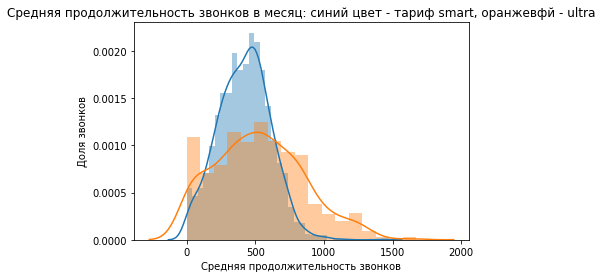

In [50]:
sns.distplot(df_tarif_smart['duration_sum'])
sns.distplot(df_tarif_ultra['duration_sum'])
plt.title('Средняя продолжительность звонков в месяц: синий цвет - тариф smart, оранжевфй - ultra')
plt.xlabel('Средняя продолжительность звонков')
plt.ylabel('Доля звонков');

In [51]:
x = df_tarif_smart['duration_sum']
variance_smart = np.var(x, ddof=1)
y = df_tarif_ultra['duration_sum']
variance_ultra = np.var(y, ddof=1)
print(variance_smart) 
print(variance_ultra) 

35730.77201379571
105620.9346513949


У обладателей тарифа ultra в среднем продолжительность звонков больше, чем с тарифом smart. Обладатели тарифа smart за месяц проговаривают 419 минут, по тарифу ultra более 529 минут. Для абонентов тарифа ultra больше дисперсия и стандартное отклонение.
Для абонентов тарифа ultra дисперсия составляет 105000, стандартное отклонение - 324, для абонентов тарифа smart дисперсия составляет 35000, стандартное отклонение - 189.

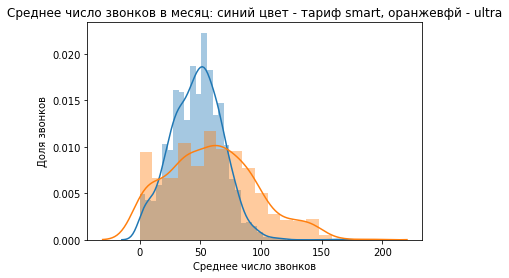

In [52]:
sns.distplot(df_tarif_smart['duration_count'])
sns.distplot(df_tarif_ultra['duration_count'])
plt.title('Среднее число звонков в месяц: синий цвет - тариф smart, оранжевфй - ultra')
plt.xlabel('Среднее число звонков')
plt.ylabel('Доля звонков');

Обладатели тарифа smart за месяц в среднем совершают 47 звонков, по тарифу ultra до 60. 

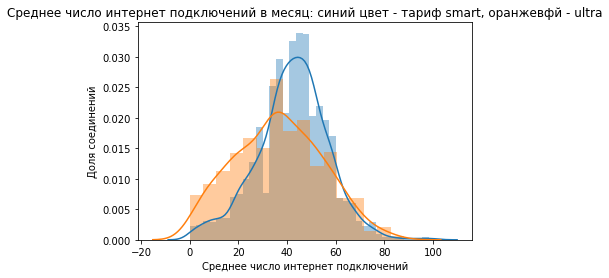

In [53]:
sns.distplot(df_tarif_smart['mb_count'])
sns.distplot(df_tarif_ultra['mb_count'])
plt.title('Среднее число интернет подключений в месяц: синий цвет - тариф smart, оранжевфй - ultra')
plt.xlabel('Среднее число интернет подключений')
plt.ylabel('Доля соединений');

У обладателей тарифа ultra в среднем продолжительность звонков немного больше, чем с тарифом smart. Обладатели тарифа smart за месяц подключаются 36 раз, по тарифу ultra 42.

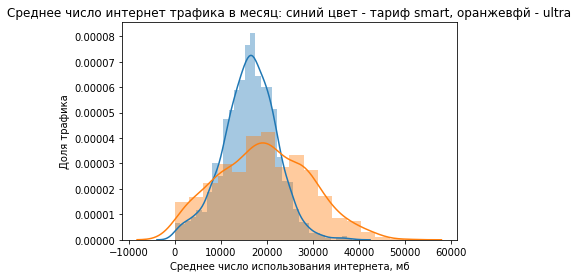

In [54]:
sns.distplot(df_tarif_smart['mb_sum'])
sns.distplot(df_tarif_ultra['mb_sum'])
plt.title('Среднее число интернет трафика в месяц: синий цвет - тариф smart, оранжевфй - ultra')
plt.xlabel('Среднее число использования интернета, мб')
plt.ylabel('Доля трафика');

Обладатели тарифа ultra в среднем потребляют больше трафика, чем с тарифом smart. Обладатели тарифа smart за месяц потребляют в среднем 16ГБ, по тарифу ultra 19ГБ.

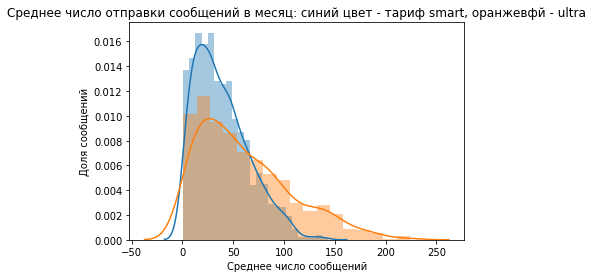

In [55]:
sns.distplot(df_tarif_smart['message_count'])
sns.distplot(df_tarif_ultra['message_count'])
plt.title('Среднее число отправки сообщений в месяц: синий цвет - тариф smart, оранжевфй - ultra')
plt.xlabel('Среднее число сообщений')
plt.ylabel('Доля сообщений');

Обладатели тарифа ultra в среднем отправляют больше сообщений, чем с тарифом smart. Обладатели тарифа smart за месяц отправляют в среднем 38 сообщений, по тарифу ultra 61 сообщение. наши гистограммы смещены влево, обладатеои тарифов очень мало пользуются отправкой сообщений.

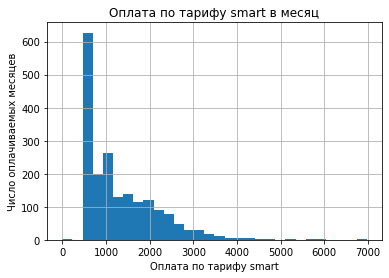

In [56]:
df_tarif_smart.hist('paid', bins=30);
plt.title('Оплата по тарифу smart в месяц')
plt.xlabel('Оплата по тарифу smart')
plt.ylabel('Число оплачиваемых месяцев');

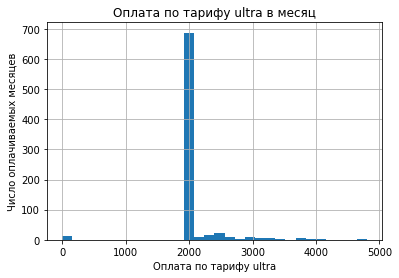

In [57]:
df_tarif_ultra.hist('paid', bins=30);
plt.title('Оплата по тарифу ultra в месяц')
plt.xlabel('Оплата по тарифу ultra')
plt.ylabel('Число оплачиваемых месяцев');

Общая переплата для тарифа ultra за год

In [58]:
display(df_tarif_ultra['overpayment'].sum())

78300

Общая переплата для тарифа smart за год

In [59]:
display(df_tarif_smart['overpayment'].sum())

1450398

Общая выручка для тарифа ultra за год

In [60]:
display(df_tarif_ultra['paid'].sum())

1607100.0

Общая выручка для тарифа smart за год

In [61]:
display(df_tarif_smart['paid'].sum())

2506398.0

Средняя выручка для тарифа ultra за год на одного абонента

In [62]:
display(df_tarif_ultra['paid'].sum()/149)

10785.906040268457

Средняя выручка для тарифа smart за год на одного абонента

In [63]:
display(df_tarif_smart['paid'].sum()/351)

7140.735042735043

### Вывод

Поведение пользователей по тарифу ultra и smart практически не различаются. Средние значения и медианные очень близки для количества звонков, числа звонков и интернет трафика за месяц. По отправленным сообщениям поведение на двух тарифах схожее - отправляется малое количество сообщений или совсем ими не пользуются. Обладатели тарифа smart чаще переплачивают в связи с нехваткой услуг включенных в пакет в среднем расходуя дополнительно 755 рублей. Обладатели тарифа ultra практически всегда хватает своего пакета на месяц в среднем переплачивая 98 рублей. Больше всего дохода в год приносит тариф smart, но и абонентов у него намного больше. Средняя выручка с одного обонента в год больше на тарифе ultra и составляет 10.8 т.р против 7.1 т.р. для тарифа smart.

### Шаг 4. Проверим гипотезы

#### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Нулевая гипотеза:
Среднее генеральной совокупности выручки пользователей тарифов «Ультра» и среднее генеральной совокупности выручки пользователей тарифов «Смарт» равны между собой.

Зададим критический уровень статистической значимости в 5% для нашей нулевой гипотезы. Сопоставим две генеральных совокупности по выручке от тарифов за месяц. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно.

In [64]:
from scipy import stats as st
alpha = .05

results = st.ttest_ind(
    df_tarif_smart['paid'], 
    df_tarif_ultra['paid'])


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.681275537659624e-107
Отвергаем нулевую гипотезу


Средние значения выручки пользователей тарифов за месяц сильно различаются. Наша гипотеза подтверждается.

#### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза:
Среднее генеральной совокупности выручки пользователей из Москвы и среднее генеральной совокупности выручки пользователей  из других регионов равны между собой.

Зададим критический уровень статистической значимости в 5% для нашей нулевой гипотезы. Сопоставим две генеральных совокупности по средней выручке от пользователей из Москвы за месяц от выручки от пользователей из других регионов. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно. Для начала определим пользователей из Москвы и других регионов

In [65]:
df_moscow = df_tarif.query('city == "Москва"')
#df_moscow
df_city = df_tarif.query('city != "Москва"')
#df_city

In [66]:
alpha = .05

results = st.ttest_ind(
    df_moscow['paid'], 
    df_city['paid'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.37346416889171996
Не получилось отвергнуть нулевую гипотезу


Средние значения выручки пользователей из Москвы и других регионов координально не различаются. Наша гипотеза не подтверждается.

### Шаг 5. Общий вывод

Мы изучили данные 500 пользователей 2-х тарифов «Смарт» и «Ультра» оператора «Мегалайна» с такими параметрами, как ежемесячная плата, стоимость услуг согласно тарифному пакету, стоимость услуг сверх тарифного пакета. 
Данные представляют собойОбработали 5 таблиц с информацией о пользователях, информацией о звонках, информацией о сообщениях, информацией об интернет-сессиях и информацией о тарифах.
Изучили общую информацию отфильтровали объединили данные из разных таблиц в единую.
Добавили столбцы с количеством сделанных звонков и израсходованных минут разговора по месяцам, количеством отправленных сообщений по месяцам, объемом израсходованного интернет-трафика по месяцам.
Посчитали помесячную выручку с каждого пользователя)
Проанализировали следующие данные:
Поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Среднее количество, дисперсию и стандартное отклонение. Построили гистограммы и опишем распределения.
Обладатели тарифа ultra в среднем совершают звонков больше, чем с тарифом smart, звонят чаще и расходуют больше интернет трафика, чаще отправляют сообщения. Обладатели тарифа smart за месяц проговаривают в среднем 419 минут, по тарифу ultra 529, в среднем совершают 36 звонков с тарифом smart, по тарифу ultra 42 и обладатели тарифа smart за месяц потребляют 16 ГБ, по тарифу ultra 19 ГБ.
Поведение пользователей по тарифу ultra и smart практически не различаются. Средние значения и медианные очень близки для количества звонков, числа звонков и интернет трафика за месяц. По отправленным сообщениям поведение на двух тарифах схожее - отправляется малое количество сообщений или совсем ими не пользуются. Обладатели тарифа smart чаще переплачивают в связи с нехваткой услуг включенных в пакет в среднем расходуя дополнительно 755 рублей. Обладатели тарифа ultra практически всегда хватает своего пакета на месяц в среднем переплачивая 98 рублей. Больше всего дохода в год приносит тариф smart, но и абонентов у него намного больше. Средняя выручка с одного обонента в год больше на тарифе ultra и составляет 10.8 т.р против 7.1 т.р. для тарифа smart.
Мы проверили следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Проанализировав данные, мы пришли к выводам:
- средние значения выручки пользователей тарифов за месяц кардинально различаются. Первая гипотеза подтверждается.
- средние значения выручки пользователей из Москвы и других регионов кардинально не различаются. Вторая гипотеза не подтверждается.

По результатам нашего анализа больше всего денег приносит тариф Смарт. Общая прибыль по данному тарифу составляет 2506398 руб.против прибыли по тарифу Ультра 1607100 руб.
В рекламной кампании на 2019 год упор надо сделать на продвижение тарифа Ультра, поскольку прибль на одного абонента намного больше прибыли по тарифу Смарт. Для тарифа Смарт выгоднее стимулировать к дополнительным тратам сверх тарифа, поскольку они приносят основную часть дохода. Больше всего дохода среди дополнительных платежей оказался интернет.